# Accident Data Analysis for Monroe County

                                                                                                   -Hinal Desai (ML51414)
                                                                                                   -Alisha Minj (WG56858)

### Introduction

This dataset contains the data for accidents happened in the Monroe County.
The aim of the below visualizations is to give a brief idea about what kinds of accidents are prdominent and what are the major cause. This will help the government to work on these issues and inturn reduce the number of accidents.

It has 12 columns. The major ones include the year, month and day of the week when the accident occured, the type of the day (whether it is a weekday or a weekend), what was the type of collision, the type of injury that happened, the primary reason behind the collision and the location where it happened.

This data has been taken from 'data.world' and url for the same is: https://data.world/city-of-bloomington/117733fb-31cb-480a-8b30-fbf425a690cd/workspace/file?filename=crash-data-monroe-county-2003-to-2015-1.csv

### Initial Requirements

In [1]:
#install library to check missing values
!pip install missingno

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import missingno as msno
import seaborn as sns
import time
print('Pandas',pd.__version__)

Pandas 1.3.4


In [3]:
#note the start time of the propram
start_time = time.time()

In [4]:
#read the data file
url = 'https://raw.githubusercontent.com/hinalbhaveshdesai/ds_data/main/MidTermProjectData.csv'
crashdata = pd.read_csv(url, encoding='latin1')
crashdata.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [5]:
#check the number of rows and columns in the dataframe
crashdata.shape

(53943, 12)

### CleanUp, Sanity check and removal of Data Inconsistencies

In [6]:
#Find number of non-null values and data type of each column in the dataframe
crashdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Master Record Number  53943 non-null  int64  
 1   Year                  53943 non-null  int64  
 2   Month                 53943 non-null  int64  
 3   Day                   53943 non-null  int64  
 4   Weekend?              53875 non-null  object 
 5   Hour                  53718 non-null  float64
 6   Collision Type        53937 non-null  object 
 7   Injury Type           53943 non-null  object 
 8   Primary Factor        52822 non-null  object 
 9   Reported_Location     53908 non-null  object 
 10  Latitude              53913 non-null  float64
 11  Longitude             53913 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.9+ MB


Here it is observed that Weekend? column has a few null values whereas the Day of the week column contains all the values.
We can fill all the null values in the Weekend? column using the Day column with the logic that if the days are 2,3,4 or 5 then it is considered as a weekday else a weekend.
On observing the data closely, it is clear that there are inconsistencies in the Weekend? column i.e. some of the days which fall under the category of 1,6 or 7 are marked as weekday instead of weekend.
Hence it is better to validate and cleanup the entire column.

In [7]:
#Sanity check, removal of data incosistencies and cleanup of Weekend? column
#Create a list and replace the existing column with the list
isWeekday = list()
for index, row in crashdata.iterrows():
    if(row['Day'] in (2,3,4,5)):
        isWeekday.append('Weekday')
    elif(row['Day'] in (1,6,7)):
        isWeekday.append('Weekend')
crashdata['Weekend?'] = isWeekday

Now we check whether there are any columns that have same value for all the rows

In [8]:
counter = 0
for this_column in crashdata.columns:
    if (crashdata[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


Now lets get the number of uniques values per column and their counts

In [9]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [10]:
uniq_per_col(crashdata,5)

====  Master Record Number has 53943 unique entries ====
902363382    1
900801155    1
900727229    1
900615874    1
900653338    1
Name: Master Record Number, dtype: int64
====  Year has 13 unique entries ====
2003    4625
2008    4341
2015    4313
2004    4269
2012    4223
Name: Year, dtype: int64
====  Month has 12 unique entries ====
10    5581
9     4994
11    4884
1     4665
12    4598
Name: Month, dtype: int64
====  Day has 7 unique entries ====
6    9680
3    8133
5    8122
4    7880
2    7473
Name: Day, dtype: int64
====  Weekend? has 2 unique entries ====
Weekday    31608
Weekend    22335
Name: Weekend?, dtype: int64
====  Hour has 24 unique entries ====
1700.0    4631
1600.0    4488
1500.0    4283
1200.0    3819
1400.0    3750
Name: Hour, dtype: int64
====  Collision Type has 7 unique entries ====
2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Name: Collision Type, dtype: int64
====  Injury Ty

Now lets find the percentage of null values in each column

In [11]:
crashdata.isnull().sum()/len(crashdata)*100

Master Record Number    0.000000
Year                    0.000000
Month                   0.000000
Day                     0.000000
Weekend?                0.000000
Hour                    0.417107
Collision Type          0.011123
Injury Type             0.000000
Primary Factor          2.078119
Reported_Location       0.064883
Latitude                0.055614
Longitude               0.055614
dtype: float64

From the above observation it is clear that, we have a good variety of data and have eliminated various data inconsistencies that would be there. We have minimal null values in the data. Hence we can conclude that we have good data.
But we still can work on the data types of object type columns.

In [12]:
#find number of unique values in various object type columns
count = 10
for col,col_type in crashdata.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',crashdata[col].nunique(),'unique entries; and the top unique values are ')
        print(crashdata[col].value_counts().head(count))


 Weekend? has 2 unique entries; and the top unique values are 
Weekday    31608
Weekend    22335
Name: Weekend?, dtype: int64

 Collision Type has 7 unique entries; and the top unique values are 
2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Pedestrian            609
Cyclist               468
Name: Collision Type, dtype: int64

 Injury Type has 4 unique entries; and the top unique values are 
No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: Injury Type, dtype: int64

 Primary Factor has 55 unique entries; and the top unique values are 
FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEE

From the above observations it is clear that the datatypes of the columns 'Weekend?', 'Collision Type', and 'Injury Type' can be converted to 'Categorical' from 'object'

In [13]:
#update the datatype of the above columns
crashdata['Weekend?'] = crashdata['Weekend?'].astype('category')
crashdata['Collision Type'] = crashdata['Collision Type'].astype('category')
crashdata['Injury Type'] = crashdata['Injury Type'].astype('category')

In [14]:
#validate whether the datatype is updated or not
print('DataType of column "Weekends?":',crashdata['Weekend?'].dtype)
print('DataType of column "Collision Type":',crashdata['Collision Type'].dtype)
print('DataType of column "Injury Type":',crashdata['Injury Type'].dtype)

DataType of column "Weekends?": category
DataType of column "Collision Type": category
DataType of column "Injury Type": category


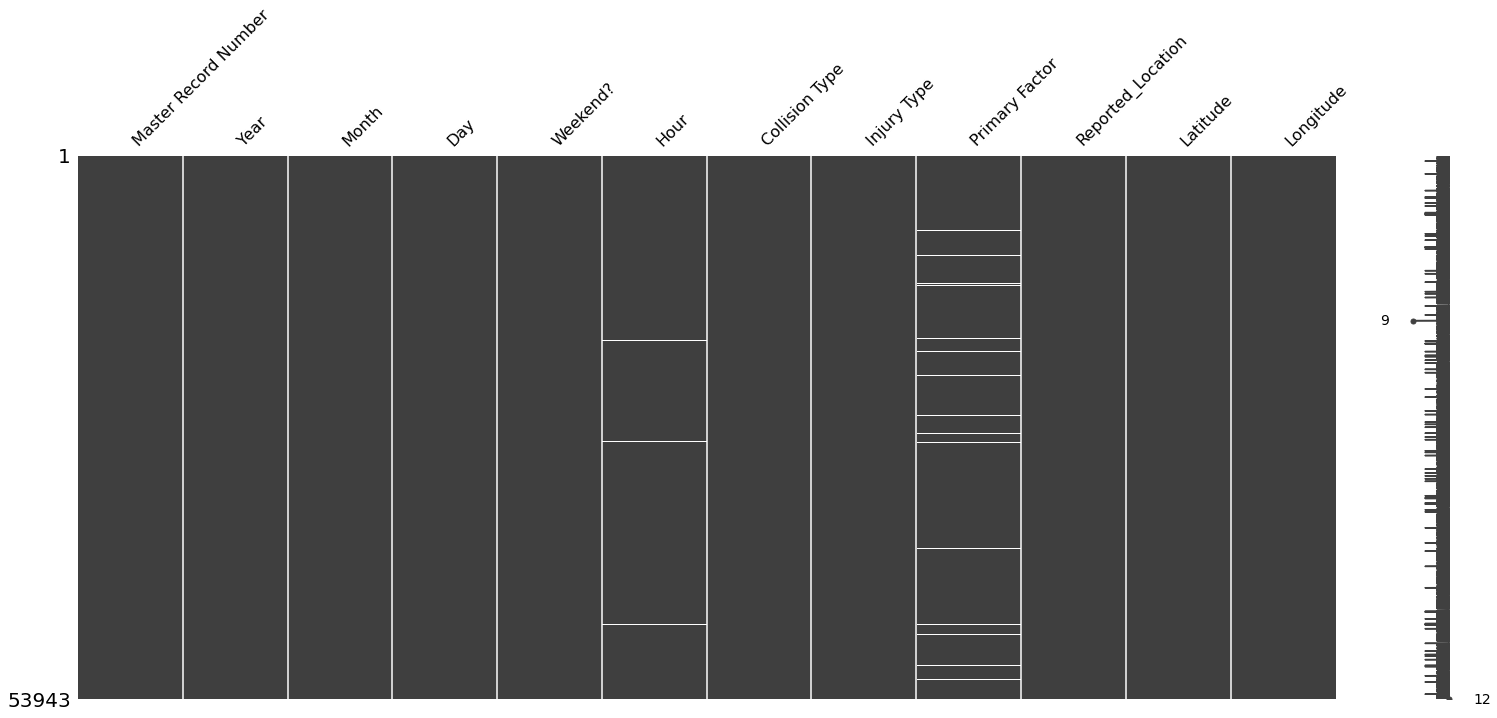

In [15]:
_=msno.matrix(crashdata.sample(crashdata.shape[0]))
#Black = filled; white = empty

#### Report

Assumptions: By observing the data we have assumed that 2,3,4 and 5 are considered as weekdays whereas 1,6, and 7 are considered as weekends.

There were inconsistencies with the data in the Weekend? column (Few days which were marked 1,6,7 were having value as 'Weekday' instead of 'Weekend'). It also had a few null values. The logic for filling the null values was identified and the already existig data was validated for inconsistencies and was updated appropriately.
There were no columns where all the rows had the same value.
There were no columns where all the rows were null.
Hence there was no need to drop any column.
There were a few columns viz 'Weekend?', 'Collision Type', and 'Injury Type' which had categorical data and hence their data type was updated for better functioning.
There was very less data that had null values and hence it was not harmfull and needed no action.
The data is now clean and ready for analysis.

### Visualizations

'\nThis shows that the number of accidents have been quite steady from 2003-2015 with no decrease in the count of accidents.\n'

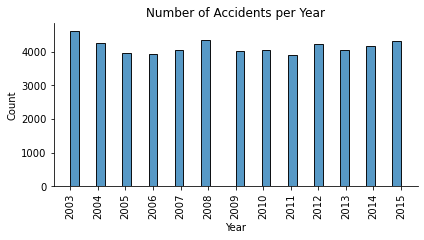

In [16]:
plot = sns.displot(data = crashdata, x= 'Year', kind = 'hist', height=3 ,aspect=2)
plot.ax.set_xticks(crashdata['Year'].unique())
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Number of Accidents per Year")
'''
This shows that the number of accidents have been quite steady from 2003-2015 with no decrease in the count of accidents.
'''

'\nThis shows that maximum accidents happen on weekdays.\nBut in hindsight if we see, we have 4 weekdays and 3 weekends. So this graph might be influenced by this factor.\nFor better understanding we should plot a graph for each day.\n'

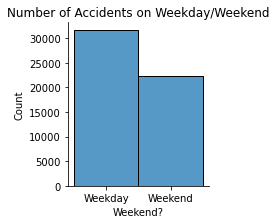

In [17]:
plot = sns.displot(data = crashdata, x= 'Weekend?', kind = 'hist', height=3 ,aspect=1)
plot.ax.set_title("Number of Accidents on Weekday/Weekend")
'''
This shows that maximum accidents happen on weekdays.
But in hindsight if we see, we have 4 weekdays and 3 weekends. So this graph might be influenced by this factor.
For better understanding we should plot a graph for each day.
'''

'\nThis graph is a prrof that maximum accidents happen on the 6th day of the week i.e. Friday which is considered as a weekend.\nHence our previous observation about more accidents happening on Weekdays was definately influenced by the number of days.\n'

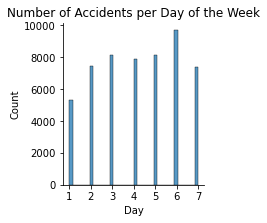

In [18]:
plot = sns.displot(data = crashdata, x= 'Day', kind = 'hist', height=3 ,aspect=1)
plot.ax.set_xticks(crashdata['Day'].sort_values().unique())
plot.ax.set_title("Number of Accidents per Day of the Week")
'''
This graph is a prrof that maximum accidents happen on the 6th day of the week i.e. Friday which is considered as a weekend.
Hence our previous observation about more accidents happening on Weekdays was definately influenced by the number of days.
'''

'\nThis shows thar majority of the accidents happen in the afternoon between 12pm to 5pm.\n'

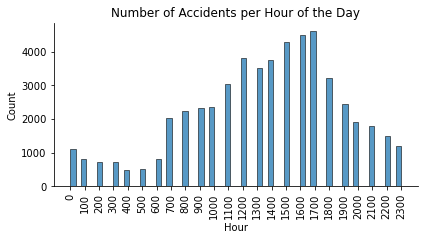

In [19]:
plot = sns.displot(data = crashdata, x= 'Hour', kind = 'hist', height=3 ,aspect=2)
plot.ax.set_xticks(crashdata['Hour'].sort_values().unique()[0:24])
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Number of Accidents per Hour of the Day")
'''
This shows thar majority of the accidents happen in the afternoon between 12pm to 5pm.
'''

'\nThis shows that majority of the accidents that happen involve 2 cars followed by 1 car.\nThere are very less chances of accidents happening which involves bus, cycles, motorcyles, or pedestrians.\n'

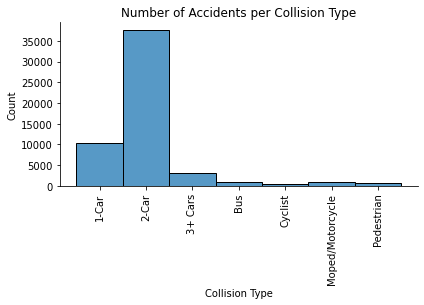

In [20]:
plot = sns.displot(data = crashdata, x= 'Collision Type', kind = 'hist', height=3 ,aspect=2)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Number of Accidents per Collision Type")
'''
This shows that majority of the accidents that happen involve 2 cars followed by 1 car.
There are very less chances of accidents happening which involves bus, cycles, motorcyles, or pedestrians.
'''

"\nThis shows that the major reason behind the various accidents is 'Failure to yield right of way'.\n"

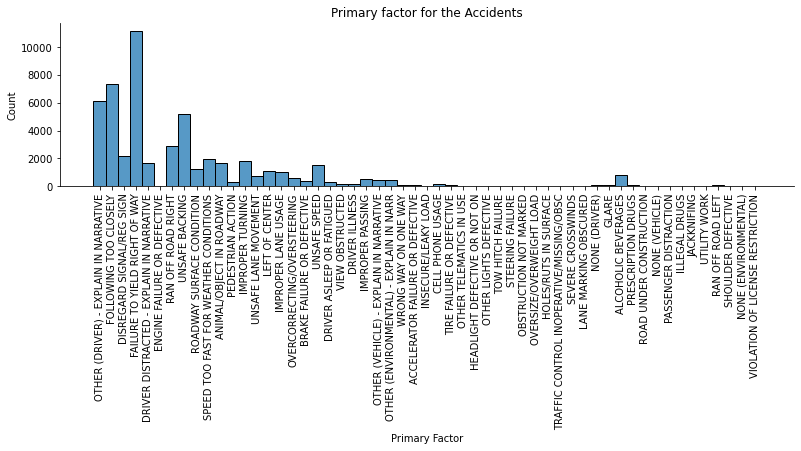

In [21]:
plot = sns.displot(data = crashdata, x="Primary Factor", kind = 'hist', height=3 ,aspect=4)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Primary factor for the Accidents")
'''
This shows that the major reason behind the various accidents is 'Failure to yield right of way'.
'''

'\nThis shows that maximum accidents happen involve 2 cars but there are no injuries involved.\nThere were very minimal accidents that were fatal.\n'

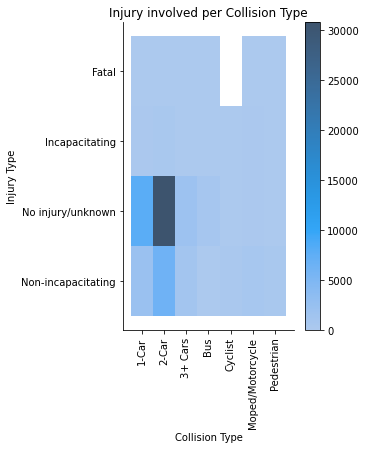

In [22]:
plot = sns.displot(crashdata, x="Collision Type", y="Injury Type", cbar = True)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Injury involved per Collision Type")
'''
This shows that maximum accidents happen involve 2 cars but there are no injuries involved.
There were very minimal accidents that were fatal.
'''

"\nThis shows that the major reason for a 2-car accident is 'Failure to yield right of way' followed by 'Following too closely'.\nHence measures should be taken to avoid the two.\n"

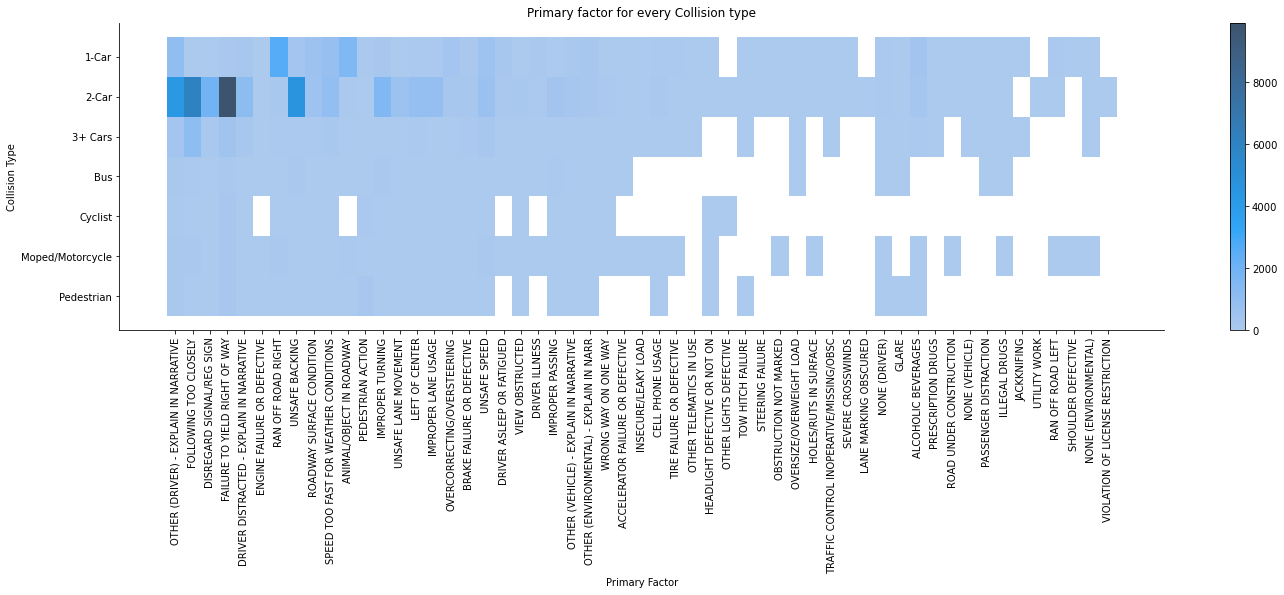

In [23]:
plot = sns.displot(crashdata, x="Primary Factor", y="Collision Type", cbar = True, aspect = 4)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Primary factor for every Collision type")
'''
This shows that the major reason for a 2-car accident is 'Failure to yield right of way' followed by 'Following too closely'.
Hence measures should be taken to avoid the two.
'''

'\nThis shows that majority of the 2-car accidents happen between 12pm and 5pm.\n'

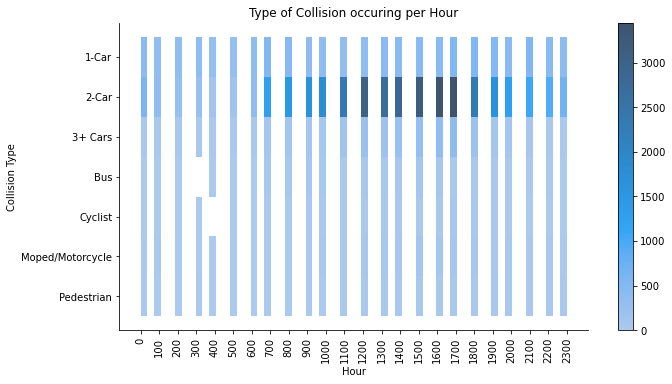

In [24]:
plot = sns.displot(crashdata, x="Hour", y="Collision Type", cbar = True, aspect = 2)
plot.ax.set_xticks(crashdata['Hour'].sort_values().unique()[0:24])
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Type of Collision occuring per Hour")
'''
This shows that majority of the 2-car accidents happen between 12pm and 5pm.
'''

'\nThis shows that maximum injuries that happen due to any collision and any reasons are non-injurious or non-incapacitating.\nMajor accidents that involve cars and buses involve no injury.\nWhereas major accidents that involve cycles, motorcycles and pedestrians are non-incapacitating.\n'

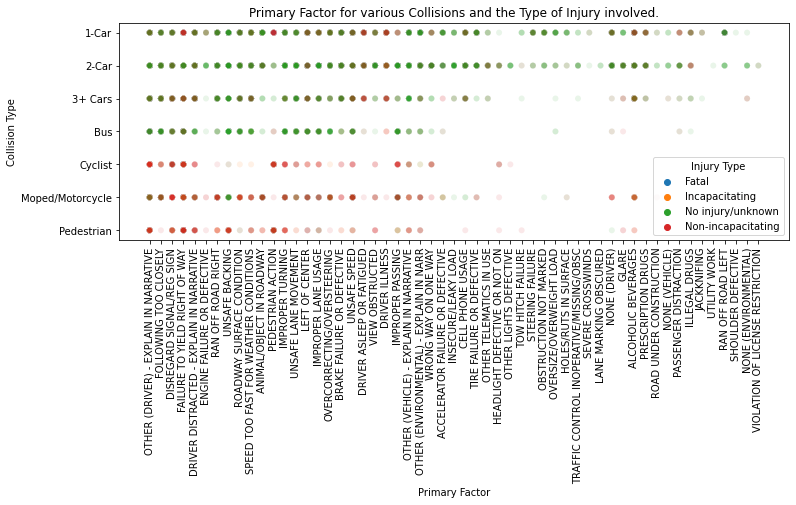

In [25]:
plot = sns.scatterplot(x= crashdata['Primary Factor'], y = crashdata['Collision Type'], hue = crashdata['Injury Type'], alpha = 0.1, sizes=(400, 400))
plot.axes.tick_params(axis = 'x', labelrotation = 90)
fig = plt.gcf()
fig.set_size_inches(12, 4)
plot.axes.set_title("Primary Factor for various Collisions and the Type of Injury involved.")
'''
This shows that maximum injuries that happen due to any collision and any reasons are non-injurious or non-incapacitating.
Major accidents that involve cars and buses involve no injury.
Whereas major accidents that involve cycles, motorcycles and pedestrians are non-incapacitating.
'''

#### Story of patterns observed.

By the above visualizations we figure that the accident rate in Monroe county has been steady over the years and has not gone down.
Least number of accidents happen on Sundays whereas maximum accidents happen on Fridays.
Maximum accidents occur between 12pm and 5pm and majority involve 2-cars.
There are various reasons for these accidents but the pre-dominent ones are: 'Failure to yield right of way', 'Following too closely', 'Unsafe backing'.
Majority of the accidents involve no injury or are non-incapacitating, which is fortunate.
There are very few accidents that invole cycles, motorcyles or pedestrians.

#### Learnings from the Project
1. Learnt the various visualization techniques.
2. Learnt the fact that data is misleading and should always be validated before use.
3. Learnt the various ways of cleaning data, performing sanity checks and removing data inconsistencies.

In [26]:
#Print the execution time taken by the program
print('The notebook took', round(time.time() - start_time, 2),'seconds to complete the execution.')

The notebook took 16.96 seconds to complete the execution.
